In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import dlib

In [15]:
class ImgUtils:
    def to_RGB(img):
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    def to_grayscale(img):
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    def calc_rect_area(rect):
        return rect.h * rect.w
    
class FaceUtils:
    def shape_to_np(shape, dtype="int"):
        # initialize the list of (x, y)-coordinates
        coords = np.zeros((68, 2), dtype=dtype)

        # loop over the 68 facial landmarks and convert them
        # to a 2-tuple of (x, y)-coordinates
        for i in range(0, 68):
            coords[i] = (shape.part(i).x, shape.part(i).y)

        # return the list of (x, y)-coordinates
        return coords
    
class Rect:
    def __init__(self, x, y, width, height):
        self.x1 = x
        self.y1 = y
        self.x2 = x + width
        self.y2 = y + height
        self.h = height
        self.w = width
        self.area = ImgUtils.calc_rect_area(self)
        
class AvgFilter:
    def __init__(self, max_window_size, min_window_size=1, confidence_interval=20.0):
        self.max = max_window_size
        self.min = min_window_size
        self.confidence = confidence_interval / 100.0
        
        self.buffer = np.zeros(self.max)
        self.index = 0
    
    def apply_filter(self, rect):
        self.buffer.put(self.index, rect.area)
        avg = np.average(self.buffer)
        
        if self.index == self.max-1: 
            self.index = 0
        else:
            self.index += 1
        
        if avg > (1.0+self.confidence) * rect.area or avg < (1.0-self.confidence) * rect.area:            
            return False
        return True
        
        

In [3]:
#read an image from file
img = cv2.imread("../data/im1.jpg", cv2.IMREAD_COLOR)

In [8]:
#Convert to RGBfrom BGR
img = ImgUtils.to_RGB(img)

In [ ]:
#Display an image with opencv imshow by 2000 milis
cv2.imshow("as",img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

In [85]:
#Capture images from video source
cap = cv2.VideoCapture(0)
default_output_path = "../data"

fourcc = cv2.VideoWriter_fourcc(*'XVID')

#OutputPath, videoCodec, FPS, imgSize, Grayscale or RGB
writer = cv2.VideoWriter(f"{default_output_path}/face.avi", fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    writer.write(frame)
    
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
writer.release()
cv2.destroyAllWindows()

In [8]:
haarcascade_path = "/opt/opencv-4.0.1/data/haarcascades/"
classifiers = [
    "haarcascade_frontalface_alt2.xml",
    "haarcascade_frontalface_alt.xml",
    "haarcascade_frontalface_default.xml"
]

#Capture images from video source
default_output_path = "../data"
avg_face_area = 0.0

avg_filter = AvgFilter(max_window_size=10,confidence_interval=20)
areas = []

for classifier in classifiers:
    cap = cv2.VideoCapture(f"{default_output_path}/face.avi")
    cascade = cv2.CascadeClassifier(haarcascade_path + classifier)
    detected_faces = 0
    filtered = 0
    
    
    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if frame is None:
            break

        # Our operations on the frame come here
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = cascade.detectMultiScale(gray, 1.5, 1)
        for x,y,h,w in faces:
            rect = Rect(x,y,w,h)
            areas.append(rect.area)
            if avg_filter.apply_filter(rect):
                cv2.rectangle(gray, (x,y), (x+w,y+h), 255, 3)
                detected_faces += 1
            else:
                filtered += 1

        # Display the resulting frame
#         cv2.imshow('frame',gray)
#         cv2.waitKey(10)

    print(f"Detected faces: {detected_faces},frames filtered {filtered} with classifier {classifier}")
    # When everything done, release the capture
    cap.release()
#     cv2.destroyAllWindows()

Detected faces: 108,frames filtered 41 with classifier haarcascade_frontalface_alt2.xml
Detected faces: 120,frames filtered 27 with classifier haarcascade_frontalface_alt.xml
Detected faces: 126,frames filtered 25 with classifier haarcascade_frontalface_default.xml


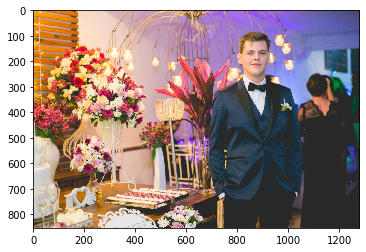

In [11]:
#displays image with matplotlib
plt.imshow(img)

In [12]:
detector = dlib.get_frontal_face_detector()

In [13]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../models/dlib/shape_predictor_68_face_landmarks.dat")

In [16]:
sha

SyntaxError: invalid syntax (<ipython-input-16-c85a7c41cff6>, line 1)